In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Problem statement - (predict the future sales revenue (Time series analysis)) 
#Predicting the sales or revenue made by a franchise in the coming year in a particular productline.

In [3]:
FS_df = pd.read_csv("C://Users//Gungu//Downloads//Franchise Shortlisting - sales_data.csv")

In [4]:
FS_df.shape

(2823, 25)

In [5]:
FS_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
FS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
FS_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/03 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/03 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
FS_df.isnull().any()

ORDERNUMBER         False
QUANTITYORDERED     False
PRICEEACH           False
ORDERLINENUMBER     False
SALES               False
ORDERDATE           False
STATUS              False
QTR_ID              False
MONTH_ID            False
YEAR_ID             False
PRODUCTLINE         False
MSRP                False
PRODUCTCODE         False
CUSTOMERNAME        False
PHONE               False
ADDRESSLINE1        False
ADDRESSLINE2         True
CITY                False
STATE                True
POSTALCODE           True
COUNTRY             False
TERRITORY            True
CONTACTLASTNAME     False
CONTACTFIRSTNAME    False
DEALSIZE            False
dtype: bool

In [9]:
#Removing 3 columns as they are not required.
FS=FS_df.drop(['ADDRESSLINE2','POSTALCODE','TERRITORY'], axis=1)

## Single Variate Analysis

In [10]:
FS.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'STATE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [11]:
FS['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

<AxesSubplot: xlabel='STATUS', ylabel='count'>

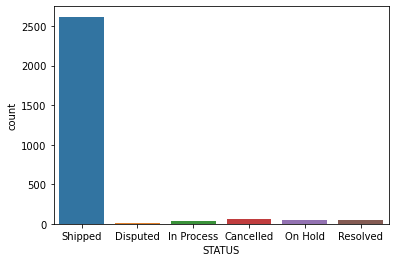

In [12]:
#Highest count is for 'Shipped' status
sns.countplot(x='STATUS', data=FS)

In [13]:
FS['PRODUCTLINE'].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

[Text(0, 0, 'Motorcycles'),
 Text(1, 0, 'Classic Cars'),
 Text(2, 0, 'Trucks and Buses'),
 Text(3, 0, 'Vintage Cars'),
 Text(4, 0, 'Planes'),
 Text(5, 0, 'Ships'),
 Text(6, 0, 'Trains')]

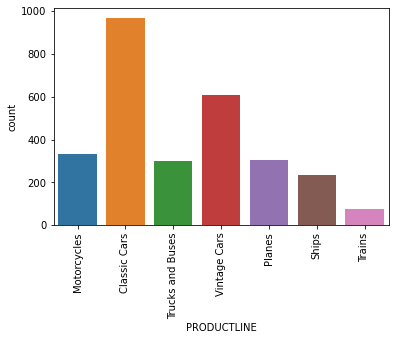

In [14]:
#Highest count is of 'ClassicCars'
ax = sns.countplot(x='PRODUCTLINE', data=FS)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [15]:
top_10_customer_counts=FS['CUSTOMERNAME'].value_counts().sort_values(ascending=False).head(10).reset_index(name='Counts')

In [16]:
#top_10_customer_counts_df = top_10_customer_counts.to_frame()

In [17]:
top_10_customer_counts

,index,Counts
0,Euro Shopping Channel,259
1,Mini Gifts Distributors Ltd.,180
2,"Australian Collectors, Co.",55
3,La Rochelle Gifts,53
4,"AV Stores, Co.",51
5,Land of Toys Inc.,49
6,Rovelli Gifts,48
7,Muscle Machine Inc,48
8,"Anna's Decorations, Ltd",46
9,Souveniers And Things Co.,46


[Text(0, 0, 'Euro Shopping Channel'),
 Text(1, 0, 'Mini Gifts Distributors Ltd.'),
 Text(2, 0, 'Australian Collectors, Co.'),
 Text(3, 0, 'La Rochelle Gifts'),
 Text(4, 0, 'AV Stores, Co.'),
 Text(5, 0, 'Land of Toys Inc.'),
 Text(6, 0, 'Rovelli Gifts'),
 Text(7, 0, 'Muscle Machine Inc'),
 Text(8, 0, "Anna's Decorations, Ltd"),
 Text(9, 0, 'Souveniers And Things Co.')]

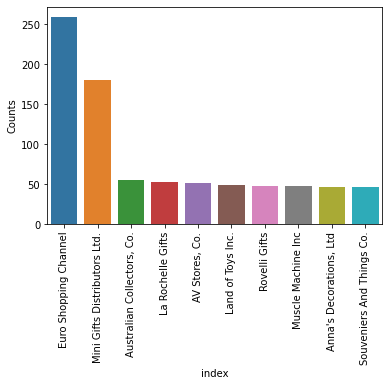

In [18]:
#'Euro Shopping Channel' has ordered highest no.of times.
ax=sns.barplot(x='index', y='Counts', data=top_10_customer_counts)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [19]:
FS['DEALSIZE'].value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

<AxesSubplot: xlabel='DEALSIZE', ylabel='count'>

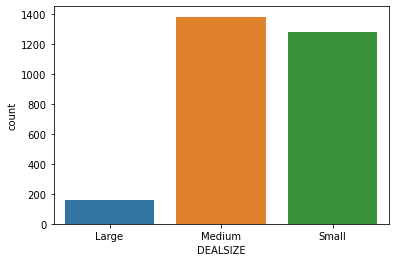

In [20]:
#'Medium' dealsize has been ordered highest no.of times.
sns.countplot(x='DEALSIZE', data=FS.sort_values('DEALSIZE'))

In [21]:
FS['YEAR_ID'].value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

<AxesSubplot: xlabel='YEAR_ID', ylabel='count'>

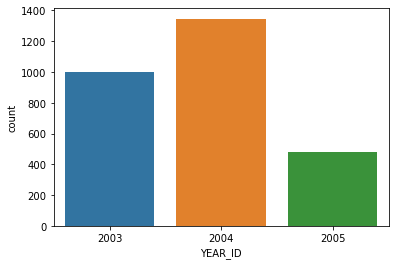

In [22]:
#Highest no.of transactions were made in 2004.
sns.countplot(x='YEAR_ID', data=FS)

In [23]:
Year=FS.groupby(['YEAR_ID'])['SALES'].mean().sort_values(ascending=True).reset_index(name='Sales')

In [24]:
Year

,YEAR_ID,Sales
0,2004,3512.388550
1,2003,3516.979540
2,2005,3747.880146


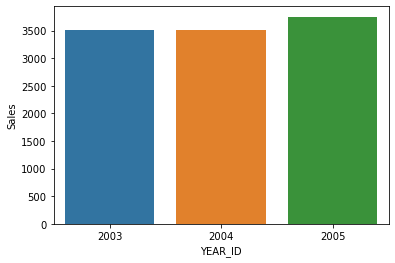

In [25]:
#Highest sales was done in the year '2005'.
ax=sns.barplot(x='YEAR_ID', y='Sales', data=Year)

In [26]:
FS.groupby(['MONTH_ID','YEAR_ID'])['SALES'].mean().sort_values(ascending=False).reset_index(name='Sales')

,MONTH_ID,YEAR_ID,Sales
0,4,2005,4672.023036
1,5,2005,3815.508833
2,7,2003,3754.637600
3,12,2003,3741.092286
4,5,2004,3695.113378
5,2,2005,3692.641031
6,3,2004,3673.816607
7,6,2003,3653.968696
8,2,2004,3621.157326
9,11,2004,3618.099701


In [27]:
Qtr=FS.groupby('QTR_ID')['SALES'].mean().sort_values(ascending=False).reset_index(name='Sales')

In [28]:
Qtr

,QTR_ID,Sales
0,2,3650.838324
1,4,3541.846444
2,1,3535.064256
3,3,3496.840577


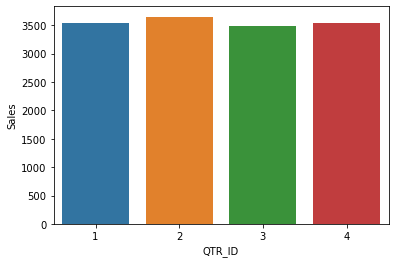

In [29]:
#Mean is the highest for 'QTR - 2'.
ax=sns.barplot(x='QTR_ID', y='Sales', data=Qtr)
#Qtr 2 of which year?

In [30]:
#Top 10 franhise who have made overall the highest sales.
top_10_franchise = FS.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10).reset_index(name='Sales')

In [31]:
top_10_franchise

,CUSTOMERNAME,Sales
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90
5,"Dragon Souveniers, Ltd.",172989.68
6,Land of Toys Inc.,164069.44
7,The Sharp Gifts Warehouse,160010.27
8,"AV Stores, Co.",157807.81
9,"Anna's Decorations, Ltd",153996.13


[Text(0, 0, 'Euro Shopping Channel'),
 Text(1, 0, 'Mini Gifts Distributors Ltd.'),
 Text(2, 0, 'Australian Collectors, Co.'),
 Text(3, 0, 'Muscle Machine Inc'),
 Text(4, 0, 'La Rochelle Gifts'),
 Text(5, 0, 'Dragon Souveniers, Ltd.'),
 Text(6, 0, 'Land of Toys Inc.'),
 Text(7, 0, 'The Sharp Gifts Warehouse'),
 Text(8, 0, 'AV Stores, Co.'),
 Text(9, 0, "Anna's Decorations, Ltd")]

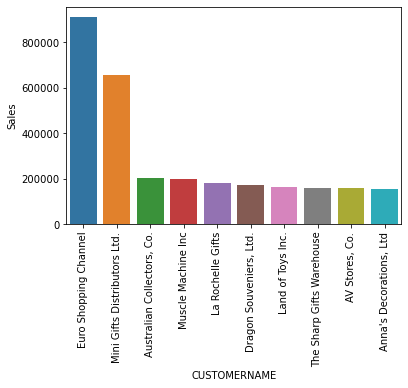

In [32]:
#Euro Shopping Channel has made the highest sales.
ax=sns.barplot(x='CUSTOMERNAME', y='Sales', data=top_10_franchise)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [33]:
#top 5 franhise who have made overall the lowest sales.
low_5_franchise = FS.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=True).head(5).reset_index(name='Sales')

In [34]:
low_5_franchise

,CUSTOMERNAME,Sales
0,Boards & Toys Co.,9129.35
1,Atelier graphique,24179.96
2,Auto-Moto Classics Inc.,26479.26
3,Microscale Inc.,33144.93
4,Royale Belge,33440.10


[Text(0, 0, 'Boards & Toys Co.'),
 Text(1, 0, 'Atelier graphique'),
 Text(2, 0, 'Auto-Moto Classics Inc.'),
 Text(3, 0, 'Microscale Inc.'),
 Text(4, 0, 'Royale Belge')]

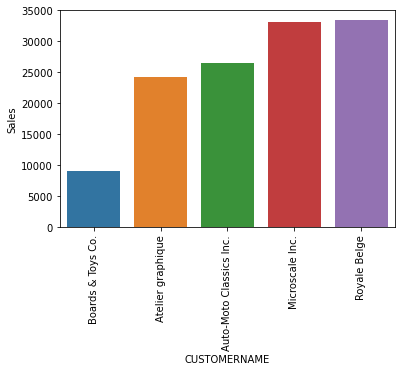

In [35]:
#'Boards & Toys Co.' has made the lowest sale.
ax=sns.barplot(x='CUSTOMERNAME', y='Sales', data=low_5_franchise)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [36]:
Productline = FS.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=True).reset_index(name='Sales')

In [37]:
Productline

,PRODUCTLINE,Sales
0,Trains,226243.47
1,Ships,714437.13
2,Planes,975003.57
3,Trucks and Buses,1127789.84
4,Motorcycles,1166388.34
5,Vintage Cars,1903150.84
6,Classic Cars,3919615.66


C:\Users\Gungu\AppData\Local\Temp\ipykernel_10840\4198331056.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(Productline['Sales'].values)


[Text(0, 0.0, '226243.47'),
 Text(0, 500000.0, '714437.13'),
 Text(0, 1000000.0, '975003.57'),
 Text(0, 1500000.0, '1127789.84'),
 Text(0, 2000000.0, '1166388.34'),
 Text(0, 2500000.0, '1903150.84'),
 Text(0, 3000000.0, '3919615.66'),
 Text(0, 3500000.0, ''),
 Text(0, 4000000.0, ''),
 Text(0, 4500000.0, '')]

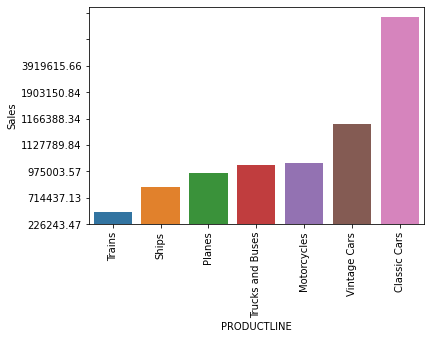

In [38]:
#Trains line has made the lowest sales.
#Classic Cars has made the highest sales.
ax=sns.barplot(x='PRODUCTLINE', y='Sales', data=Productline)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(Productline['Sales'].values)

<AxesSubplot: xlabel='PRODUCTLINE', ylabel='Sales'>

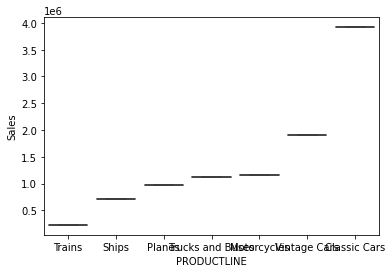

In [39]:
sns.boxplot(x='PRODUCTLINE', y='Sales', data=Productline)

In [40]:
top_10_country = FS.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False).head(10).reset_index(name='Sales')

In [41]:
top_10_country

,COUNTRY,Sales
0,Denmark,3899.002381
1,Switzerland,3797.211613
2,Sweden,3684.459825
3,Austria,3673.864182
4,Singapore,3651.752025
5,Japan,3618.611731
6,Norway,3617.220000
7,Philippines,3615.989615
8,USA,3613.528715
9,Ireland,3609.776875


[Text(0, 0, 'Denmark'),
 Text(1, 0, 'Switzerland'),
 Text(2, 0, 'Sweden'),
 Text(3, 0, 'Austria'),
 Text(4, 0, 'Singapore'),
 Text(5, 0, 'Japan'),
 Text(6, 0, 'Norway'),
 Text(7, 0, 'Philippines'),
 Text(8, 0, 'USA'),
 Text(9, 0, 'Ireland')]

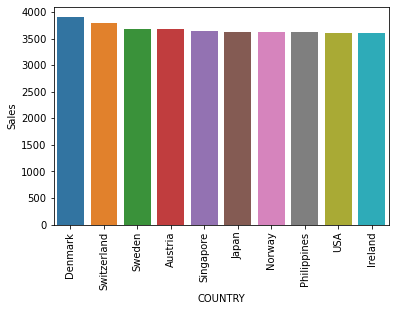

In [42]:
#'Denmark' has the highest average sales
ax=sns.barplot(x='COUNTRY', y='Sales', data=top_10_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [43]:
low_country = FS.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=True).head(5).reset_index(name='Sales')

In [44]:
low_country

,COUNTRY,Sales
0,Canada,3201.122286
1,Belgium,3285.230909
2,Italy,3315.701858
3,UK,3325.558750
4,Australia,3408.773514


[Text(0, 0, 'Canada'),
 Text(1, 0, 'Belgium'),
 Text(2, 0, 'Italy'),
 Text(3, 0, 'UK'),
 Text(4, 0, 'Australia')]

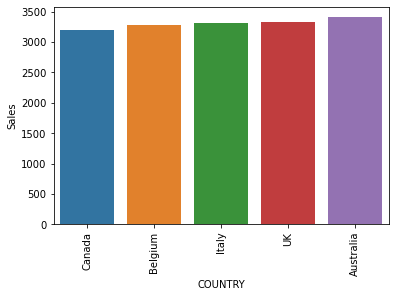

In [45]:
#'Canada' has the lowest avg sales.
ax=sns.barplot(x='COUNTRY', y='Sales', data=low_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [46]:
FS.groupby('DEALSIZE')['SALES'].mean().sort_values(ascending=True)

DEALSIZE
Small     2061.682800
Medium    4398.433699
Large     8293.753248
Name: SALES, dtype: float64

<AxesSubplot: xlabel='DEALSIZE', ylabel='SALES'>

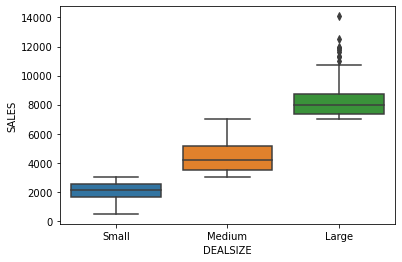

In [47]:
#Sales column has outliers
sns.boxplot(x='DEALSIZE',y='SALES',data=FS)
#ax=sns.barplot(x='CUSTOMERNAME', y='Sales', data=top_10_franchise)

In [48]:
FS.groupby('STATUS')['SALES'].mean().sort_values(ascending=True)

STATUS
Resolved      3206.771915
Cancelled     3241.458000
In Process    3529.999024
Shipped       3550.439847
On Hold       4067.708864
Disputed      5158.061429
Name: SALES, dtype: float64

<AxesSubplot: xlabel='STATUS', ylabel='SALES'>

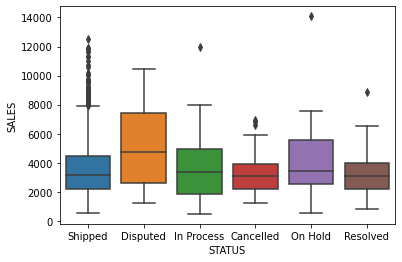

In [49]:
sns.boxplot(x='STATUS',y='SALES',data=FS)

## Bivarirate Analysis

In [50]:
#highest Qunatity ordered was by 'Tekni Collectables'.
#Quantity ordered doesn't impact on the total sales
FS.groupby('CUSTOMERNAME')['QUANTITYORDERED'].mean().sort_values(ascending=False).head(10)

CUSTOMERNAME
Tekni Collectables Inc.         43.142857
The Sharp Gifts Warehouse       41.400000
Mini Caravy                     41.000000
West Coast Collectables Co.     39.307692
Iberia Gift Imports, Corp.      39.266667
Diecast Collectables            38.611111
Atelier graphique               38.571429
Enaco Distributors              38.347826
Collectable Mini Designs Co.    38.160000
Online Mini Collectables        38.133333
Name: QUANTITYORDERED, dtype: float64

In [51]:
FS.groupby(['PRODUCTLINE', 'YEAR_ID'])['SALES'].mean().sort_values(ascending=False).head(5)

PRODUCTLINE       YEAR_ID
Classic Cars      2005       4230.020629
                  2003       4056.790410
Motorcycles       2005       4050.819483
Classic Cars      2004       3987.006991
Trucks and Buses  2003       3822.090273
Name: SALES, dtype: float64

In [52]:
CT = pd.crosstab(FS['PRODUCTLINE'], FS['YEAR_ID'],values=FS['SALES'], aggfunc='mean')
CT.assign(mean_sales=CT.mean(axis=1))
#ct.style.background_gradient(cmap='YlGn', axis=None, low=0, high=ct.max().max())

YEAR_ID,2003,2004,2005,mean_sales
PRODUCTLINE,,,,
Classic Cars,4056.790410,3987.006991,4230.020629,4091.272677
Motorcycles,3402.711743,3417.958720,4050.819483,3623.829982
Planes,3203.030588,3122.185093,3334.569500,3219.928394
Ships,3022.482593,2969.025826,3373.107105,3121.538508
Trains,2600.081786,3149.293243,3076.444167,2941.939732
Trucks and Buses,3822.090273,3727.485141,3633.816735,3727.797383
Vintage Cars,2945.645973,3209.238627,3340.581471,3165.155357


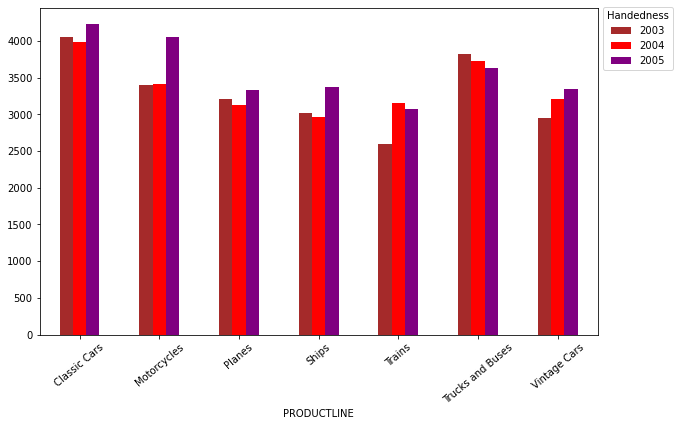

In [53]:

fig, ax = plt.subplots(figsize=(10, 6)) # create a new figure with a size of 10x6 inches

barplot = CT.plot.bar(ax=ax, rot=0, color=['brown', 'red', 'purple']) # pass the ax object to the plotting method
barplot.legend(title='Handedness', bbox_to_anchor=(1, 1.02), loc='upper left')

xticklabels = ax.get_xticklabels()
for label in xticklabels:
    label.set_rotation(40)
    
plt.show() # display the plot

In [54]:
#No quater 3 & 4 in 2005
FS.groupby(['QTR_ID', 'YEAR_ID'])['SALES'].sum()

QTR_ID  YEAR_ID
1       2003        445094.69
        2004        833730.68
        2005       1071992.36
2       2003        562365.22
        2004        766260.73
        2005        719494.35
3       2003        649514.54
        2004       1109396.27
4       2003       1860005.09
        2004       2014774.92
Name: SALES, dtype: float64

In [55]:
QT = pd.crosstab(FS['YEAR_ID'], FS['QTR_ID'],values=FS['SALES'], aggfunc='mean',normalize='index')
QT

QTR_ID,1,2,3,4
YEAR_ID,,,,
2003,0.244999,0.248404,0.252596,0.254002
2004,0.255100,0.244970,0.247935,0.251995
2005,0.464754,0.535246,0.000000,0.000000


In [56]:
#Overall sales was high in quater 4 of year 2003 & 2004
#According to the data highest sales was in year 2004
QT = pd.crosstab(FS['YEAR_ID'], FS['QTR_ID'],values=FS['SALES'], aggfunc='mean')
QT.assign(mean_sales=QT.mean(axis=1))

QTR_ID,1,2,3,4,mean_sales
YEAR_ID,,,,,
2003,3423.805308,3471.390247,3529.970326,3549.628034,3493.698479
2004,3578.243262,3436.146771,3477.731254,3534.692842,3506.703532
2005,3549.643576,4088.036080,NaN,NaN,3818.839828


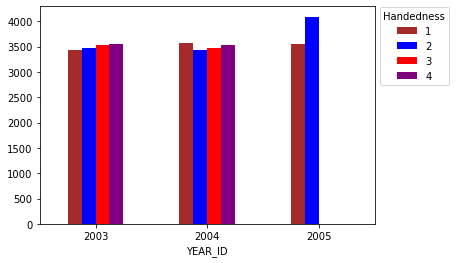

In [57]:
# Creating barplot
barplot = QT.plot.bar(rot=0, color=['brown', 'blue', 'red','purple'])
barplot.legend(title='Handedness', bbox_to_anchor=(1, 1.02),
         loc='upper left')

In [58]:
#Japan has the highest sales in Classic Cars
FS.groupby(['COUNTRY','PRODUCTLINE'])['SALES'].mean().sort_values(ascending=False).head(10)

COUNTRY  PRODUCTLINE     
Japan    Classic Cars        5908.936250
Norway   Trains              5655.180000
Belgium  Planes              5624.790000
Ireland  Classic Cars        5281.470000
Austria  Motorcycles         5209.532000
Sweden   Motorcycles         5189.083333
Germany  Trucks and Buses    5089.000000
Belgium  Classic Cars        5034.240000
Denmark  Trucks and Buses    4794.410000
         Classic Cars        4623.014118
Name: SALES, dtype: float64

In [59]:
CP = pd.crosstab(FS['COUNTRY'], FS['PRODUCTLINE'],values=FS['SALES'], aggfunc='mean')
#CP.assign(mean_sales=CP.mean(axis=1))
CP

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
COUNTRY,,,,,,,
Australia,3643.123396,3460.336923,2994.154800,2079.880000,1681.350000,3865.925000,3268.195172
Austria,4058.378800,5209.532000,2976.740000,2256.182500,NaN,4094.550000,2719.748000
Belgium,5034.240000,NaN,5624.790000,2882.546364,3005.753333,NaN,2994.685714
Canada,4401.658571,4177.490000,2551.007000,2879.215000,NaN,3246.623750,2700.852667
Denmark,4623.014118,NaN,3793.225000,2764.090000,2869.082500,4794.410000,3015.115714
Finland,4040.848421,3682.055385,2864.594167,3312.048889,2558.525000,3679.939091,2626.142857
France,3968.889796,3329.269265,3379.859688,3166.031905,3905.828571,3899.407333,3044.996724
Germany,4119.861111,2499.166667,2875.157500,2750.500000,2521.710000,5089.000000,2326.212222
Ireland,5281.470000,2476.600000,2946.090000,NaN,1556.300000,3983.050000,2234.400000


In [60]:
FS.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False).head().reset_index(name='Sales')

,COUNTRY,Sales
0,Denmark,3899.002381
1,Switzerland,3797.211613
2,Sweden,3684.459825
3,Austria,3673.864182
4,Singapore,3651.752025


In [61]:
#Classic Cars has the highest average sales.
#Vinatge Cars has the lowest average sales.
QP = pd.crosstab(FS['PRODUCTLINE'], FS['QTR_ID'],values=FS['SALES'], aggfunc='mean')
QP.assign(mean_sales=QP.mean(axis=1))

QTR_ID,1,2,3,4,mean_sales
PRODUCTLINE,,,,,
Classic Cars,4056.584793,4380.678457,4072.505246,3896.555026,4101.580880
Motorcycles,3478.757105,3754.355000,3331.167188,3512.699402,3519.244674
Planes,3254.951528,3088.184375,2980.269792,3306.975094,3157.595197
Ships,3342.250820,3111.180000,2869.005238,2905.262706,3056.924691
Trains,2905.790000,2940.405833,2630.010667,3113.088000,2897.323625
Trucks and Buses,3364.823226,3822.832063,3627.472909,3957.201405,3693.082401
Vintage Cars,3192.258854,3039.522342,3103.492813,3154.913210,3122.546805


In [62]:
QP_2 = pd.crosstab(FS['PRODUCTLINE'], FS['QTR_ID'],values=FS['SALES'], aggfunc='mean')

In [63]:
QPI = pd.crosstab(FS['PRODUCTLINE'], FS['QTR_ID'],values=FS['SALES'], aggfunc='mean', normalize='index')
QPI

QTR_ID,1,2,3,4
PRODUCTLINE,,,,
Classic Cars,0.247257,0.267012,0.248228,0.237503
Motorcycles,0.247124,0.266702,0.236639,0.249535
Planes,0.257708,0.244504,0.235960,0.261827
Ships,0.273334,0.254437,0.234632,0.237597
Trains,0.250731,0.253717,0.226934,0.268618
Trucks and Buses,0.227779,0.258783,0.245559,0.267879
Vintage Cars,0.255581,0.243353,0.248474,0.252591


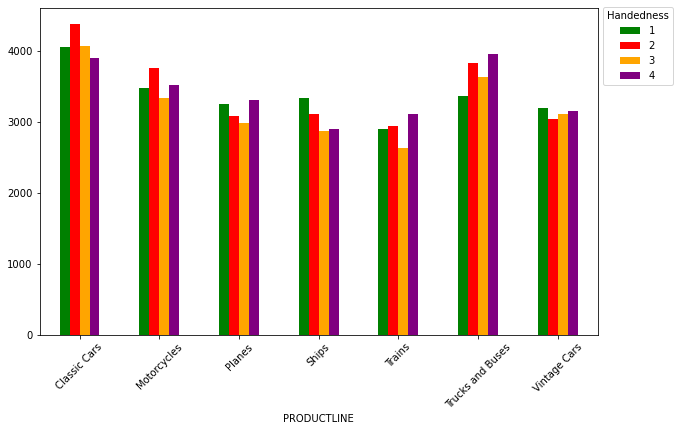

In [64]:
# Creating barplot
fig, ax = plt.subplots(figsize=(10, 6)) # create a new figure with a size of 10x6 inches

barplot = QP_2.plot.bar(ax=ax, rot=0, color=['green', 'red', 'orange','purple']) # pass the ax object to the plotting method
barplot.legend(title='Handedness', bbox_to_anchor=(1, 1.02), loc='upper left')

xticklabels = ax.get_xticklabels()
for label in xticklabels:
    label.set_rotation(45)
    
plt.show() # display the plot

In [65]:
#Euro Shooping Channel highest sale groupby year.
FS.groupby(['CUSTOMERNAME','YEAR_ID'])['SALES'].sum().sort_values(ascending=False).head(10)

CUSTOMERNAME                  YEAR_ID
Euro Shopping Channel         2004       375268.36
                              2005       326798.17
Mini Gifts Distributors Ltd.  2004       256474.26
                              2005       213255.68
Euro Shopping Channel         2003       210227.58
Mini Gifts Distributors Ltd.  2003       185128.12
Dragon Souveniers, Ltd.       2003       165686.20
Australian Collectors, Co.    2004       140859.57
Land of Toys Inc.             2004       138285.68
Muscle Machine Inc            2003       132778.24
Name: SALES, dtype: float64

In [66]:
SC = pd.crosstab(FS['CUSTOMERNAME'], FS['STATUS'],values=FS['SALES'], aggfunc='mean')
SC

STATUS,Cancelled,Disputed,In Process,On Hold,Resolved,Shipped
CUSTOMERNAME,,,,,,
"AV Stores, Co.",NaN,NaN,NaN,NaN,NaN,3094.270784
Alpha Cognac,NaN,NaN,NaN,NaN,NaN,3524.422000
Amica Models & Co.,NaN,NaN,NaN,NaN,NaN,3619.894615
"Anna's Decorations, Ltd",NaN,NaN,NaN,NaN,NaN,3347.741957
Atelier graphique,NaN,NaN,NaN,NaN,NaN,3454.280000
...,...,...,...,...,...,...
"Vida Sport, Ltd",NaN,NaN,NaN,NaN,NaN,3797.211613
Vitachrome Inc.,NaN,NaN,NaN,NaN,NaN,3521.650400
"Volvo Model Replicas, Co",NaN,NaN,NaN,4376.701667,NaN,3807.282308


In [67]:
#Euro Shopping Channel has highest number of shipped orders.
FS.groupby(['CUSTOMERNAME', 'STATUS']).size().reset_index(name='counts').sort_values(by='counts',ascending=False).head(2)

,CUSTOMERNAME,STATUS,counts
41,Euro Shopping Channel,Shipped,213
68,Mini Gifts Distributors Ltd.,Shipped,178


In [68]:
FS.groupby(['CUSTOMERNAME', 'STATUS']).size().reset_index(name='counts').sort_values(by='counts',ascending=True).head(2)

,CUSTOMERNAME,STATUS,counts
31,Diecast Classics Inc.,In Process,2
67,Mini Gifts Distributors Ltd.,In Process,2


## Hypothesis Building

In [69]:
#Euro Shopping Channel has cancelled highest no.of orders.
FS[FS['STATUS']=='Cancelled'].groupby(['CUSTOMERNAME']).size().sort_values(ascending=False)

CUSTOMERNAME
Euro Shopping Channel      16
Scandinavian Gift Ideas    16
Land of Toys Inc.          14
UK Collectables, Ltd.      14
dtype: int64

In [70]:
#Denmark has the highest overall mean sales.
FS.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False).head().reset_index(name='Sales')

,COUNTRY,Sales
0,Denmark,3899.002381
1,Switzerland,3797.211613
2,Sweden,3684.459825
3,Austria,3673.864182
4,Singapore,3651.752025


In [71]:
FS.groupby(['COUNTRY', 'PRODUCTLINE'])['SALES'].mean().reset_index(name='mean_sales').sort_values(by='mean_sales',ascending=False).head(10)

,COUNTRY,PRODUCTLINE,mean_sales
64,Japan,Classic Cars,5908.936250
74,Norway,Trains,5655.180000
14,Belgium,Planes,5624.790000
51,Ireland,Classic Cars,5281.470000
8,Austria,Motorcycles,5209.532000
95,Sweden,Motorcycles,5189.083333
49,Germany,Trucks and Buses,5089.000000
13,Belgium,Classic Cars,5034.240000
28,Denmark,Trucks and Buses,4794.410000
24,Denmark,Classic Cars,4623.014118


### Classic Cars vs Country

In [72]:
#Which country has made the overall highest sales in Classic Cars - Japan.

#FS[FS['COUNTRY']=='Japan'].PRODUCTLINE.sum('SALES')
#FS[(FS['COUNTRY']=='Japan') & (FS['']==2010)].PRODUCTLINE.value_counts()
FS[FS['COUNTRY']=='Japan'].groupby(['PRODUCTLINE']).SALES.mean()

PRODUCTLINE
Classic Cars        5908.936250
Motorcycles         2948.490000
Planes              3073.560000
Ships               3772.004000
Trains              1761.835000
Trucks and Buses    4449.813333
Vintage Cars        3272.202222
Name: SALES, dtype: float64

In [73]:
FS_Japan = FS[FS['COUNTRY'] == 'Japan']
city_J = FS_Japan['CITY'].value_counts()

In [74]:
FS_Japan

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
39,10258,32,100.00,6,7680.64,6/15/04 0:00,Shipped,2,6,2004,...,S10_1949,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Tokyo,Japan,Shimamura,Akiko,Large
63,10210,23,100.00,2,3009.09,01-12-2004 00:00,Shipped,1,1,2004,...,S10_2016,Osaka Souveniers Co.,+81 06 6342 5555,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",Osaka,Osaka,Japan,Kentary,Mory,Medium
74,10339,40,68.92,4,2756.80,11/23/04 0:00,Shipped,4,11,2004,...,S10_2016,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Tokyo,Japan,Shimamura,Akiko,Small
89,10210,34,100.00,1,6123.40,01-12-2004 00:00,Shipped,1,1,2004,...,S10_4698,Osaka Souveniers Co.,+81 06 6342 5555,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",Osaka,Osaka,Japan,Kentary,Mory,Medium
100,10339,39,76.67,3,2990.13,11/23/04 0:00,Shipped,4,11,2004,...,S10_4698,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Tokyo,Japan,Shimamura,Akiko,Small
225,10258,41,100.00,3,6668.24,6/15/04 0:00,Shipped,2,6,2004,...,S12_1666,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Tokyo,Japan,Shimamura,Akiko,Medium
288,10372,40,100.00,4,5862.00,1/26/05 0:00,Shipped,1,1,2005,...,S12_3148,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Tokyo,Japan,Shimamura,Akiko,Medium
338,10372,34,100.00,1,5941.50,1/26/05 0:00,Shipped,1,1,2005,...,S12_3891,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Tokyo,Japan,Shimamura,Akiko,Medium
433,10258,41,100.00,5,5453.00,6/15/04 0:00,Shipped,2,6,2004,...,S18_1097,"Tokyo Collectables, Ltd",+81 3 3584 0555,2-2-8 Roppongi,Minato-ku,Tokyo,Japan,Shimamura,Akiko,Medium
459,10240,41,100.00,3,5628.89,4/13/04 0:00,Shipped,2,4,2004,...,S18_1129,Osaka Souveniers Co.,+81 06 6342 5555,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",Osaka,Osaka,Japan,Kentary,Mory,Medium


In [75]:
#There are 2 cities in Japan
city_J

Minato-ku    32
Osaka        20
Name: CITY, dtype: int64

In [76]:
#Overall sales of Japan is low when compared to Denmark
FS[FS['COUNTRY']=='Japan'].SALES.mean()

3618.6117307692302

In [77]:
FS[FS['COUNTRY']=='Denmark'].SALES.mean()

3899.002380952381

In [78]:
#Which city in japan has more sales based on the productline - Minato-ku & Osaka
FS[FS['COUNTRY']=='Japan'].groupby(['CITY','CUSTOMERNAME','PRODUCTLINE']).SALES.mean().sort_values(ascending=False)

CITY       CUSTOMERNAME             PRODUCTLINE     
Minato-ku  Tokyo Collectables, Ltd  Classic Cars        6031.412000
Osaka      Osaka Souveniers Co.     Classic Cars        5704.810000
Minato-ku  Tokyo Collectables, Ltd  Trucks and Buses    4449.813333
                                    Ships               3772.004000
                                    Vintage Cars        3625.531429
Osaka      Osaka Souveniers Co.     Motorcycles         3329.230000
Minato-ku  Tokyo Collectables, Ltd  Planes              3233.928333
Osaka      Osaka Souveniers Co.     Planes              2977.339000
Minato-ku  Tokyo Collectables, Ltd  Motorcycles         2472.565000
Osaka      Osaka Souveniers Co.     Vintage Cars        2035.550000
Minato-ku  Tokyo Collectables, Ltd  Trains              1761.835000
Name: SALES, dtype: float64

In [79]:
FS[FS['COUNTRY']=='Japan'].groupby(['CITY','CUSTOMERNAME','PRODUCTLINE']).SALES.mean().sort_values(ascending=False)

CITY       CUSTOMERNAME             PRODUCTLINE     
Minato-ku  Tokyo Collectables, Ltd  Classic Cars        6031.412000
Osaka      Osaka Souveniers Co.     Classic Cars        5704.810000
Minato-ku  Tokyo Collectables, Ltd  Trucks and Buses    4449.813333
                                    Ships               3772.004000
                                    Vintage Cars        3625.531429
Osaka      Osaka Souveniers Co.     Motorcycles         3329.230000
Minato-ku  Tokyo Collectables, Ltd  Planes              3233.928333
Osaka      Osaka Souveniers Co.     Planes              2977.339000
Minato-ku  Tokyo Collectables, Ltd  Motorcycles         2472.565000
Osaka      Osaka Souveniers Co.     Vintage Cars        2035.550000
Minato-ku  Tokyo Collectables, Ltd  Trains              1761.835000
Name: SALES, dtype: float64

### Motorcycle vs country

In [80]:
#Which country has made the overall highest mean sales in Motorcycles - Sweden.
FS[FS['COUNTRY']=='Sweden'].groupby(['PRODUCTLINE']).SALES.mean()

PRODUCTLINE
Classic Cars        4064.003529
Motorcycles         5189.083333
Planes              2966.533333
Ships               3091.589000
Trains              3807.680000
Trucks and Buses    4357.388182
Vintage Cars        2817.038333
Name: SALES, dtype: float64

In [81]:
FS_Sweden = FS[FS['COUNTRY'] == 'Sweden']
city_counts = FS_Sweden['CITY'].value_counts()

In [82]:
FS_Sweden

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
27,10112,29,100.00,1,7209.11,3/24/03 0:00,Shipped,1,3,2003,...,S10_1949,"Volvo Model Replicas, Co",0921-12 3555,Berguvsv„gen 8,Lule,NaN,Sweden,Berglund,Christina,Large
42,10291,37,100.00,11,7136.19,09-08-2004 00:00,Shipped,3,9,2004,...,S10_1949,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,NaN,Sweden,Larsson,Maria,Large
111,10167,44,100.00,9,5924.16,10/23/03 0:00,Cancelled,4,10,2003,...,S10_4757,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,NaN,Sweden,Larsson,Maria,Medium
149,10291,30,100.00,4,3855.90,09-08-2004 00:00,Shipped,3,9,2004,...,S10_4962,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,NaN,Sweden,Larsson,Maria,Medium
153,10334,26,100.00,2,3188.12,11/19/04 0:00,On Hold,4,11,2004,...,S10_4962,"Volvo Model Replicas, Co",0921-12 3555,Berguvsv„gen 8,Lule,NaN,Sweden,Berglund,Christina,Medium
179,10320,31,100.00,3,6876.11,11-03-2004 00:00,Shipped,4,11,2004,...,S12_1099,"Volvo Model Replicas, Co",0921-12 3555,Berguvsv„gen 8,Lule,NaN,Sweden,Berglund,Christina,Medium
184,10389,26,99.04,4,2575.04,03-03-2005 00:00,Shipped,1,3,2005,...,S12_1099,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,NaN,Sweden,Larsson,Maria,Small
228,10291,41,100.00,8,6387.80,09-08-2004 00:00,Shipped,3,9,2004,...,S12_1666,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,NaN,Sweden,Larsson,Maria,Medium
309,10320,35,100.00,1,4850.30,11-03-2004 00:00,Shipped,4,11,2004,...,S12_3380,"Volvo Model Replicas, Co",0921-12 3555,Berguvsv„gen 8,Lule,NaN,Sweden,Berglund,Christina,Medium
314,10389,25,72.38,6,1809.50,03-03-2005 00:00,Shipped,1,3,2005,...,S12_3380,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,NaN,Sweden,Larsson,Maria,Small


In [83]:
#There are 2 cities in Sweden
city_counts

Boras    38
Lule     19
Name: CITY, dtype: int64

In [84]:
#Wich city in Sweden has more sales based on the productline - Boras
#Franchise - Scandinavian Gift Ideas
FS[FS['COUNTRY']=='Sweden'].groupby(['CITY','CUSTOMERNAME','PRODUCTLINE']).SALES.mean().sort_values(ascending=False)

CITY   CUSTOMERNAME              PRODUCTLINE     
Boras  Scandinavian Gift Ideas   Motorcycles         5189.083333
Lule   Volvo Model Replicas, Co  Trucks and Buses    5048.322500
                                 Classic Cars        4109.422500
Boras  Scandinavian Gift Ideas   Classic Cars        4023.631111
                                 Trucks and Buses    3962.568571
Lule   Volvo Model Replicas, Co  Trains              3807.680000
                                 Ships               3336.645000
                                 Vintage Cars        3051.310000
Boras  Scandinavian Gift Ideas   Ships               3030.325000
                                 Planes              2966.533333
                                 Vintage Cars        2699.902500
Name: SALES, dtype: float64

### Planes vs country

In [85]:
#Which country has made the overall highest mean sales in Planes - Philippines.
FS[FS['COUNTRY']=='Philippines'].groupby(['PRODUCTLINE']).SALES.mean()

PRODUCTLINE
Classic Cars    4085.545385
Motorcycles     2580.240000
Planes          4181.374000
Vintage Cars    1935.090000
Name: SALES, dtype: float64

In [86]:
FS_Phili = FS[FS['COUNTRY'] == 'Philippines']
city_P = FS_Phili['CITY'].value_counts()

In [87]:
FS_Phili

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
161,10108,33,100.00,6,5265.15,03-03-2003 00:00,Shipped,1,3,2003,...,S12_1099,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Medium
291,10108,45,100.00,4,6130.35,03-03-2003 00:00,Shipped,1,3,2003,...,S12_3380,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Medium
342,10108,39,89.38,7,3485.82,03-03-2003 00:00,Shipped,1,3,2003,...,S12_3990,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Medium
394,10108,36,100.00,3,3731.04,03-03-2003 00:00,Shipped,1,3,2003,...,S12_4675,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Medium
560,10198,42,100.00,4,7483.98,11/27/03 0:00,Shipped,4,11,2003,...,S18_1662,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Large
600,10108,38,82.39,2,3130.82,03-03-2003 00:00,Shipped,1,3,2003,...,S18_1889,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Medium
1090,10108,26,68.35,9,1777.10,03-03-2003 00:00,Shipped,1,3,2003,...,S18_3278,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Small
1140,10108,29,100.00,8,4049.56,03-03-2003 00:00,Shipped,1,3,2003,...,S18_3482,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Medium
1159,10330,37,100.00,3,4405.22,11/16/04 0:00,Shipped,4,11,2004,...,S18_3482,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Medium
1190,10108,43,67.77,12,2914.11,03-03-2003 00:00,Shipped,1,3,2003,...,S18_3782,Cruz & Sons Co.,+63 2 555 3587,15 McCallum Street - NatWest Center #13-03,Makati City,NaN,Philippines,Cruz,Arnold,Small


In [88]:
#There is only 1 city in Philippines
city_P

Makati City    26
Name: CITY, dtype: int64

In [89]:
#Wich city in Philippines has more sales based on the productline - Makati
#Franchise - Cruz & Sons Co.  
FS[FS['COUNTRY']=='Philippines'].groupby(['CITY','CUSTOMERNAME','PRODUCTLINE']).SALES.mean().sort_values(ascending=False)

CITY         CUSTOMERNAME     PRODUCTLINE 
Makati City  Cruz & Sons Co.  Planes          4181.374000
                              Classic Cars    4085.545385
                              Motorcycles     2580.240000
                              Vintage Cars    1935.090000
Name: SALES, dtype: float64

### Ships vs country

In [90]:
#Which country has made the overall highest mean sales in Ships - Japan.
FS[FS['COUNTRY']=='Japan'].groupby(['PRODUCTLINE']).SALES.mean()

PRODUCTLINE
Classic Cars        5908.936250
Motorcycles         2948.490000
Planes              3073.560000
Ships               3772.004000
Trains              1761.835000
Trucks and Buses    4449.813333
Vintage Cars        3272.202222
Name: SALES, dtype: float64

In [91]:
#Which city in japan has more sales based on the productline - Minato-ku
#Franchise - Tokyo Collectables, Ltd
FS[FS['COUNTRY']=='Japan'].groupby(['CITY','CUSTOMERNAME','PRODUCTLINE']).SALES.mean().sort_values(ascending=False)

CITY       CUSTOMERNAME             PRODUCTLINE     
Minato-ku  Tokyo Collectables, Ltd  Classic Cars        6031.412000
Osaka      Osaka Souveniers Co.     Classic Cars        5704.810000
Minato-ku  Tokyo Collectables, Ltd  Trucks and Buses    4449.813333
                                    Ships               3772.004000
                                    Vintage Cars        3625.531429
Osaka      Osaka Souveniers Co.     Motorcycles         3329.230000
Minato-ku  Tokyo Collectables, Ltd  Planes              3233.928333
Osaka      Osaka Souveniers Co.     Planes              2977.339000
Minato-ku  Tokyo Collectables, Ltd  Motorcycles         2472.565000
Osaka      Osaka Souveniers Co.     Vintage Cars        2035.550000
Minato-ku  Tokyo Collectables, Ltd  Trains              1761.835000
Name: SALES, dtype: float64

### Trains vs country

In [92]:
#Which country has made the overall highest mean sales in Trains - Norway.
FS[FS['COUNTRY']=='Norway'].groupby(['PRODUCTLINE']).SALES.mean()

PRODUCTLINE
Classic Cars        3851.067714
Motorcycles         3697.759286
Planes              2681.881818
Trains              5655.180000
Trucks and Buses    4119.515556
Vintage Cars        3072.928571
Name: SALES, dtype: float64

In [93]:
FS_Norway = FS[FS['COUNTRY'] == 'Norway']
city_N = FS_Norway['CITY'].value_counts()

In [94]:
FS_Norway

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
7,10188,48,100.00,1,5512.32,11/18/03 0:00,Shipped,4,11,2003,...,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,NaN,Norway,Oeztan,Veysel,Medium
17,10309,41,100.00,5,4394.38,10/15/04 0:00,Shipped,4,10,2004,...,S10_1678,Baane Mini Imports,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,Norway,Bergulfsen,Jonas,Medium
26,10103,26,100.00,11,5404.62,1/29/03 0:00,Shipped,1,1,2003,...,S10_1949,Baane Mini Imports,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,Norway,Bergulfsen,Jonas,Medium
61,10188,38,96.34,4,3660.92,11/18/03 0:00,Shipped,4,11,2003,...,S10_2016,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,NaN,Norway,Oeztan,Veysel,Medium
87,10188,45,100.00,3,8714.70,11/18/03 0:00,Shipped,4,11,2003,...,S10_4698,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,NaN,Norway,Oeztan,Veysel,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,10284,45,100.00,8,4576.95,8/21/04 0:00,Shipped,3,8,2004,...,S700_2466,"Norway Gifts By Mail, Co.",+47 2212 1555,"Drammensveien 126 A, PB 744 Sentrum",Oslo,NaN,Norway,Klaeboe,Jan,Medium
2614,10103,42,100.00,6,4460.82,1/29/03 0:00,Shipped,1,1,2003,...,S700_2824,Baane Mini Imports,07-98 9555,Erling Skakkes gate 78,Stavern,NaN,Norway,Bergulfsen,Jonas,Medium
2646,10188,29,100.00,8,3957.05,11/18/03 0:00,Shipped,4,11,2003,...,S700_2834,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,NaN,Norway,Oeztan,Veysel,Medium
2678,10284,25,69.60,7,1740.00,8/21/04 0:00,Shipped,3,8,2004,...,S700_3167,"Norway Gifts By Mail, Co.",+47 2212 1555,"Drammensveien 126 A, PB 744 Sentrum",Oslo,NaN,Norway,Klaeboe,Jan,Small


In [95]:
#There are 3 cities in Norway
city_N

Stavern    32
Bergen     29
Oslo       24
Name: CITY, dtype: int64

In [96]:
#Which city in Norway has more sales based on the productline - Stavern
#Franchise - Baane Mini Imports
FS[FS['COUNTRY']=='Norway'].groupby(['CITY','CUSTOMERNAME','PRODUCTLINE']).SALES.mean().sort_values(ascending=False)

CITY     CUSTOMERNAME               PRODUCTLINE     
Stavern  Baane Mini Imports         Trains              5655.180000
Bergen   Herkku Gifts               Motorcycles         4360.612857
Stavern  Baane Mini Imports         Classic Cars        4130.395714
                                    Trucks and Buses    4119.515556
Oslo     Norway Gifts By Mail, Co.  Classic Cars        4098.069091
Bergen   Herkku Gifts               Vintage Cars        4090.775000
                                    Planes              3957.050000
                                    Classic Cars        3576.225882
Stavern  Baane Mini Imports         Motorcycles         3034.905714
Oslo     Norway Gifts By Mail, Co.  Vintage Cars        2867.273333
Stavern  Baane Mini Imports         Vintage Cars        2579.440000
Oslo     Norway Gifts By Mail, Co.  Planes              2554.365000
Name: SALES, dtype: float64

### Trucks and Buses vs country

In [97]:
#Which country has made the overall highest mean sales in Trucks and Buses - Germany.
FS[FS['COUNTRY']=='Germany'].groupby(['PRODUCTLINE']).SALES.mean()

PRODUCTLINE
Classic Cars        4119.861111
Motorcycles         2499.166667
Planes              2875.157500
Ships               2750.500000
Trains              2521.710000
Trucks and Buses    5089.000000
Vintage Cars        2326.212222
Name: SALES, dtype: float64

In [98]:
FS_Germany = FS[FS['COUNTRY'] == 'Germany']
city_g = FS_Germany['CITY'].value_counts()

In [99]:
FS_Germany

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
168,10191,21,100.00,3,3840.90,11/20/03 0:00,Shipped,4,11,2003,...,S12_1099,"Toms Spezialitten, Ltd",0221-5554327,Mehrheimerstr. 369,Koln,NaN,Germany,Pfalzheim,Henriette,Medium
177,10300,33,100.00,5,5521.89,10-04-2003 00:00,Shipped,4,10,2003,...,S12_1099,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,Germany,Keitel,Roland,Medium
178,10310,33,100.00,10,6934.62,10/16/04 0:00,Shipped,4,10,2004,...,S12_1099,"Toms Spezialitten, Ltd",0221-5554327,Mehrheimerstr. 369,Koln,NaN,Germany,Pfalzheim,Henriette,Medium
277,10230,43,100.00,1,7016.31,3/15/04 0:00,Shipped,1,3,2004,...,S12_3148,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,NaN,Germany,Keitel,Roland,Large
298,10191,40,100.00,1,5590.00,11/20/03 0:00,Shipped,4,11,2003,...,S12_3380,"Toms Spezialitten, Ltd",0221-5554327,Mehrheimerstr. 369,Koln,NaN,Germany,Pfalzheim,Henriette,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,10296,34,100.00,11,3477.86,9/15/04 0:00,Shipped,3,9,2004,...,S700_2047,"Bavarian Collectables Imports, Co.",+49 89 61 08 9555,Hansastr. 15,Munich,NaN,Germany,Donnermeyer,Michael,Medium
2576,10296,24,100.00,4,2441.04,9/15/04 0:00,Shipped,3,9,2004,...,S700_2466,"Bavarian Collectables Imports, Co.",+49 89 61 08 9555,Hansastr. 15,Munich,NaN,Germany,Donnermeyer,Michael,Small
2679,10296,22,80.80,3,1777.60,9/15/04 0:00,Shipped,3,9,2004,...,S700_3167,"Bavarian Collectables Imports, Co.",+49 89 61 08 9555,Hansastr. 15,Munich,NaN,Germany,Donnermeyer,Michael,Small
2758,10296,47,86.62,5,4071.14,9/15/04 0:00,Shipped,3,9,2004,...,S700_4002,"Bavarian Collectables Imports, Co.",+49 89 61 08 9555,Hansastr. 15,Munich,NaN,Germany,Donnermeyer,Michael,Medium


In [100]:
#There are 3 cities in Germany
city_g

Koln         26
Frankfurt    22
Munich       14
Name: CITY, dtype: int64

In [101]:
#Which city in germany has more sales based on the productline - Frankfurt
#Franchise - Blauer See Auto, Co.
FS[FS['COUNTRY']=='Germany'].groupby(['CITY','CUSTOMERNAME','PRODUCTLINE']).SALES.mean().sort_values(ascending=False)

CITY       CUSTOMERNAME                        PRODUCTLINE     
Frankfurt  Blauer See Auto, Co.                Trucks and Buses    5089.000000
                                               Classic Cars        4269.686154
Koln       Toms Spezialitten, Ltd              Classic Cars        4035.177391
Frankfurt  Blauer See Auto, Co.                Vintage Cars        2888.850000
Munich     Bavarian Collectables Imports, Co.  Planes              2875.157500
                                               Ships               2750.500000
Frankfurt  Blauer See Auto, Co.                Trains              2521.710000
Koln       Toms Spezialitten, Ltd              Motorcycles         2499.166667
Munich     Bavarian Collectables Imports, Co.  Vintage Cars        1622.915000
Name: SALES, dtype: float64

### Vintage Cars vs country

In [102]:
#Which country has made the overall highest mean sales in Vintage cars - USA.
FS[FS['COUNTRY']=='USA'].groupby(['PRODUCTLINE']).SALES.mean()

PRODUCTLINE
Classic Cars        4087.046261
Motorcycles         3492.427517
Planes              3457.188316
Ships               2995.544857
Trains              2770.142400
Trucks and Buses    3552.164464
Vintage Cars        3382.838839
Name: SALES, dtype: float64

In [103]:
FS_USA = FS[FS['COUNTRY'] == 'USA']
FS_U= FS_USA['CITY'].value_counts()

In [104]:
FS_USA

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/03 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/03 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/03 0:00,Shipped,4,10,2003,...,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,CA,USA,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12-01-2003 00:00,Shipped,4,12,2003,...,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,San Francisco,CA,USA,Murphy,Julie,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,10185,28,64.43,6,1804.04,11/14/03 0:00,Shipped,4,11,2003,...,S72_3212,Mini Creations Ltd.,5085559555,4575 Hillside Dr.,New Bedford,MA,USA,Tam,Wing C,Small
2807,10222,36,63.34,18,2280.24,2/19/04 0:00,Shipped,1,2,2004,...,S72_3212,Collectable Mini Designs Co.,7605558146,361 Furth Circle,San Diego,CA,USA,Thompson,Valarie,Small
2809,10248,23,65.52,9,1506.96,05-07-2004 00:00,Cancelled,2,5,2004,...,S72_3212,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small
2817,10337,42,97.16,5,4080.72,11/21/04 0:00,Shipped,4,11,2004,...,S72_3212,Classic Legends Inc.,2125558493,5905 Pompton St.,NYC,NY,USA,Hernandez,Maria,Medium


In [105]:
FS_U

San Rafael       180
NYC              152
San Francisco     62
New Bedford       61
Brickhaven        47
Boston            44
Philadelphia      44
San Jose          40
Cambridge         38
Nashua            34
Burlingame        34
Allentown         31
Pasadena          30
Las Vegas         29
White Plains      26
San Diego         25
Bridgewater       25
Glendale          22
Newark            21
New Haven         17
Brisbane          15
Los Angeles       14
Burbank           13
Name: CITY, dtype: int64

In [106]:
#Which city in germany has more sales based on the productline - Burlingame 
#Franchise - Technics Stores Inc.
FS[FS['COUNTRY']=='USA'].groupby(['CITY','CUSTOMERNAME','PRODUCTLINE']).SALES.mean().sort_values(ascending=False)

CITY          CUSTOMERNAME                 PRODUCTLINE 
New Bedford   FunGiftIdeas.com             Planes          8610.550000
Cambridge     Cambridge Collectables Co.   Classic Cars    6463.230000
Burbank       West Coast Collectables Co.  Classic Cars    6075.300000
Boston        Gifts4AllAges.com            Trains          5808.480000
New Haven     Super Scale Inc.             Classic Cars    5686.417143
                                                              ...     
Burlingame    Technics Stores Inc.         Vintage Cars    2009.793333
Glendale      Gift Ideas Corp.             Ships           1891.780000
White Plains  Mini Classics                Trains          1804.440000
NYC           Microscale Inc.              Vintage Cars    1698.780000
Cambridge     Cambridge Collectables Co.   Planes          1599.960000
Name: SALES, Length: 152, dtype: float64

In [107]:
FS.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'STATE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [108]:
FS.groupby(['CUSTOMERNAME','YEAR_ID','PRODUCTLINE','COUNTRY'])['SALES'].sum().sort_values(ascending=False).head()

CUSTOMERNAME                  YEAR_ID  PRODUCTLINE   COUNTRY    
Euro Shopping Channel         2004     Classic Cars  Spain          184272.20
                              2005     Classic Cars  Spain          136833.25
Vida Sport, Ltd               2004     Classic Cars  Switzerland    117713.56
Mini Gifts Distributors Ltd.  2005     Classic Cars  USA             96298.41
Muscle Machine Inc            2003     Classic Cars  USA             95656.62
Name: SALES, dtype: float64

In [109]:
#Highest no.of orders cancelled were by Scandinavian Gift Ideas for 'Classic Cars'
FS[FS['STATUS']=='Cancelled'].groupby(['PRODUCTLINE','CUSTOMERNAME']).SALES.mean().sort_values(ascending=False)

PRODUCTLINE   CUSTOMERNAME           
Classic Cars  Scandinavian Gift Ideas    5924.160000
Trains        Land of Toys Inc.          5082.420000
Classic Cars  UK Collectables, Ltd.      3600.589286
Ships         Euro Shopping Channel      3419.880000
Vintage Cars  Euro Shopping Channel      3327.556000
Ships         Land of Toys Inc.          3197.911250
              Scandinavian Gift Ideas    3030.325000
Planes        Scandinavian Gift Ideas    2966.533333
              Euro Shopping Channel      2948.123333
Vintage Cars  Land of Toys Inc.          2945.387500
Classic Cars  Land of Toys Inc.          2910.400000
Vintage Cars  Scandinavian Gift Ideas    2411.140000
Name: SALES, dtype: float64

### Convert month into datetime

In [110]:
FS.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'STATE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [111]:
FS['YEAR_ID'].unique()

array([2003, 2004, 2005], dtype=int64)

In [112]:
FS['Year_Month'] = FS['YEAR_ID'].astype(str) + '-' + FS['MONTH_ID'].astype(str)

In [113]:
FS.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year_Month
0,10107,30,95.70,2,2871.00,2/24/03 0:00,Shipped,1,2,2003,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small,2003-2
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,France,Henriot,Paul,Small,2003-5
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,France,Da Cunha,Daniel,Medium,2003-7
3,10145,45,83.26,6,3746.70,8/25/03 0:00,Shipped,3,8,2003,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium,2003-8
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium,2003-10


In [114]:
FS['Year_Month']=pd.to_datetime(FS['Year_Month'])

In [115]:
FS['Year_Month']

0      2003-02-01
1      2003-05-01
2      2003-07-01
3      2003-08-01
4      2003-10-01
          ...    
2818   2004-12-01
2819   2005-01-01
2820   2005-03-01
2821   2005-03-01
2822   2005-05-01
Name: Year_Month, Length: 2823, dtype: datetime64[ns]

In [116]:
df = FS.groupby('Year_Month')['SALES'].sum().reset_index(name="sales")

In [117]:
df

,Year_Month,sales
0,2003-01-01,129753.60
1,2003-02-01,140836.19
2,2003-03-01,174504.90
3,2003-04-01,201609.55
4,2003-05-01,192673.11
5,2003-06-01,168082.56
6,2003-07-01,187731.88
7,2003-08-01,197809.30
8,2003-09-01,263973.36
9,2003-10-01,568290.97


In [118]:
df_index = FS.groupby('Year_Month')['SALES'].sum().reset_index(name="sales")

In [119]:
df_index.set_index('Year_Month',inplace=True)

In [120]:
df_index

,sales
Year_Month,
2003-01-01,129753.60
2003-02-01,140836.19
2003-03-01,174504.90
2003-04-01,201609.55
2003-05-01,192673.11
2003-06-01,168082.56
2003-07-01,187731.88
2003-08-01,197809.30
2003-09-01,263973.36


## ARIMA and Seasonal ARIMA MODEL

In [121]:
#! pip install pmdarima

In [122]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

<AxesSubplot: xlabel='Year_Month'>

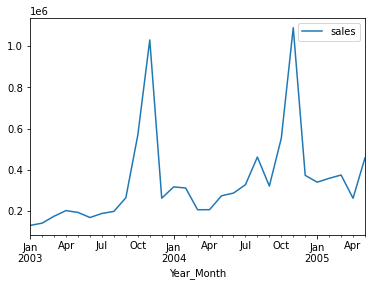

In [123]:
#Understanding the pattern
df_index.plot()

From the above, we can observe that there is seasonality associated with the data. Every year there is a spike in sales which continued from 2003 to 2005.

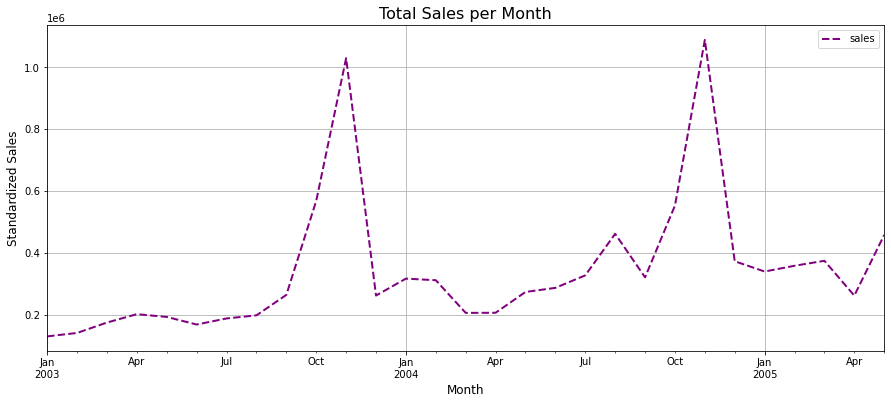

In [124]:
fig, ax = plt.subplots(figsize=(15, 6))
df.plot(kind='line', ax=ax,x='Year_Month', y='sales', color='purple', linestyle='--', linewidth=2)

ax.set_title('Total Sales per Month', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Standardized Sales', fontsize=12)


# Add a grid
ax.grid(True)

plt.show()


In [125]:
#Test for Stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_index)

(0.30494782171739687, True)

From the above, we can conclude that the data is stationary.

In [126]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Gungu\Downloads\Jupyter\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

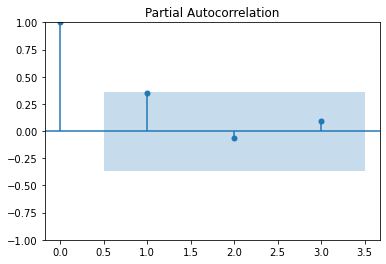

In [127]:
plot_pacf(df_index, lags=3)
plt.show

We chose AR(1) model as the lag 1 is significant and others are weak.

In [128]:
'''n=4
df_index['seasonal_diff'] = df_index['sales'] - df_index['sales'].shift(n)
df'''

"n=4\ndf_index['seasonal_diff'] = df_index['sales'] - df_index['sales'].shift(n)\ndf"

In [129]:
'''df_index['seasonal_diff'].dropna().plot()'''

"df_index['seasonal_diff'].dropna().plot()"

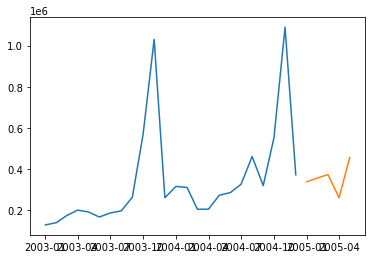

In [132]:
#Train and Test split
train = df_index[:24]
test = df_index[-5:]
plt.plot(train)
plt.plot(test)

## Model 1

In [132]:
arima_model_1 = auto_arima(train, d=1,
                        max_p=5, max_d=5, max_q=5, start_p=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True, error_action='warn',
                        trace=True,supress_warnings=True, stepwise=True,
                        random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=373.075, Time=0.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=289.846, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=289.169, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=289.209, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=287.472, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=289.169, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=291.169, Time=0.11 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=289.721, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=288.500, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=287.506, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=289.412, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.320 seconds


In [133]:
arima_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -141.736
Date:                            Thu, 09 Mar 2023   AIC                            287.472
Time:                                    13:25:23   BIC                            288.268
Sample:                                01-01-2003   HQIC                           286.970
                                     - 12-01-2004                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0086      0.319     -0.027      0.978      -0.633       0.616
sigma2      9.946e+09   1.54e-11   6.45e+20      0.000    9.95e+09    9.95e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.04
Prob(Q):                              0.93   Prob(JB):                         0.60
Heteroskedasticity (H):               2.13   Skew:                            -0.72
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

### Interpretation

Low AIC(k) and High Log(l) , A model with low number of parameters(which keeps it simple).
AIC - A model which fits the data well but also relatively few paramters.
BIC - Lower BIC via higher log likelihood or less parameters or less samples used in fitting. 
LOG - the more complicated your model is the worst it fits the testing data as it will not be able to generalize the tested data. 

The key paramters here are m=12( It represents the number of time periods in a seasonal cycle. For example, if the time series data has monthly observations and exhibits a yearly seasonal pattern, then the seasonal period m would be 12 (i.e., one year)),
n_fits = 50(specifies the maximum number of candidate models to fit during the model selection process, In general, larger values of n_fits increase the chances of finding the best model but also increase the computational time required.n_fits is set to 50, which means that the model selection process will fit up to 50 candidate models.)

AIC , BIC and Log values are equal but the no.of fits is more. 

In [134]:
#Forecasting on the test data
prediction = pd.DataFrame(arima_model_1.predict(n_periods = 12))
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
2005-01-01,4.270579e+05
2005-02-01,4.219038e+05
2005-03-01,3.162180e+05
2005-04-01,3.166324e+05
2005-05-01,3.839227e+05
2005-06-01,3.971585e+05
2005-07-01,4.376284e+05
2005-08-01,5.719855e+05
2005-09-01,4.312352e+05
2005-10-01,6.634085e+05


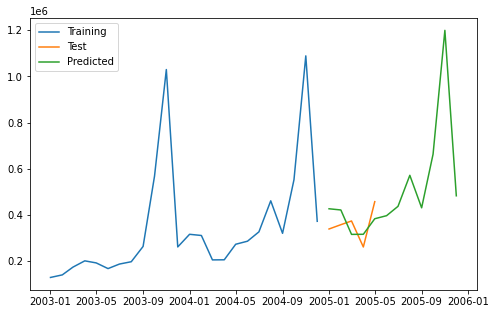

In [135]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper left')
plt.show()

### Model 2

In [213]:
arima_model_2 = auto_arima(train, d=1,
                        max_p=5, max_d=5, max_q=5, start_p=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True, error_action='warn',
                        trace=True,supress_warnings=True, stepwise=True,
                        random_state=20, n_fits=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=373.075, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=289.846, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=289.169, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=289.209, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=287.472, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=289.169, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=291.169, Time=0.09 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=289.721, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=288.500, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=287.506, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=289.412, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.778 seconds


In [214]:
arima_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -141.736
Date:                            Wed, 08 Mar 2023   AIC                            287.472
Time:                                    12:47:32   BIC                            288.268
Sample:                                01-01-2003   HQIC                           286.970
                                     - 12-01-2004                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0086      0.319     -0.027      0.978      -0.633       0.616
sigma2      9.946e+09   1.54e-11   6.45e+20      0.000    9.95e+09    9.95e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.04
Prob(Q):                              0.93   Prob(JB):                         0.60
Heteroskedasticity (H):               2.13   Skew:                            -0.72
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [217]:
#Forecasting on the test data
prediction_2 = pd.DataFrame(arima_model_2.predict(n_periods = 12))
prediction.columns = ['predicted_sales_2']
prediction_2

,0
2005-01-01,4.270579e+05
2005-02-01,4.219038e+05
2005-03-01,3.162180e+05
2005-04-01,3.166324e+05
2005-05-01,3.839227e+05
2005-06-01,3.971585e+05
2005-07-01,4.376284e+05
2005-08-01,5.719855e+05
2005-09-01,4.312352e+05
2005-10-01,6.634085e+05


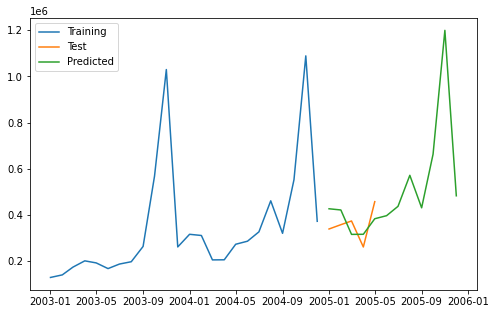

In [218]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction_2,label='Predicted')
plt.legend(loc='upper left')
plt.show()

#### Conclusion: We Choose Model 2 as the n_fits (BIC) is less for model 2

In [143]:
'''from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['sales'],test['predicted_sales'])'''

"from sklearn.metrics import r2_score\ntest['predicted_sales'] = prediction\nr2_score(test['sales'],test['predicted_sales'])"

In [134]:
df.to_excel(r'C:\Users\Gungu\Downloads\Jupyter\python_files\monthly_df.xlsx', index=False)

In [219]:
prediction_2.to_excel(r'C:\Users\Gungu\Downloads\Jupyter\python_files\prediction_df.xlsx', index=False)